In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/train_identity.csv
/kaggle/input/train_transaction.csv
/kaggle/input/test_transaction.csv
/kaggle/input/test_identity.csv
/kaggle/input/sample_submission.csv


In [3]:
folder_path = '../input/'
train_identity = pd.read_csv(f'{folder_path}train_identity.csv')
train_transaction = pd.read_csv(f'{folder_path}train_transaction.csv')
test_identity = pd.read_csv(f'{folder_path}test_identity.csv')
test_transaction = pd.read_csv(f'{folder_path}test_transaction.csv')
sub = pd.read_csv(f'{folder_path}sample_submission.csv')

In [4]:
print("train_identity.shape",train_identity.shape)
print("train_transaction.shape",train_transaction.shape)
print("test_identity.shape",test_identity.shape)
print("test_transaction.shape",test_transaction.shape)

train_identity.shape (144233, 41)
train_transaction.shape (590540, 394)
test_identity.shape (141907, 41)
test_transaction.shape (506691, 393)


## Merge the data to get train ##

In [5]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
train.shape

(590540, 434)

In [6]:
train['V330'].value_counts(dropna=False, normalize=True).head()

NaN     0.860550
 0.0    0.123275
 1.0    0.008804
 2.0    0.002945
 3.0    0.001097
Name: V330, dtype: float64

In [7]:
del train_identity, train_transaction, test_identity, test_transaction

## Drop V1~V339 columns##

In [8]:
train.drop(columns=list(train.filter(regex='V')), inplace=True)
# test.drop(columns=list(test.filter(regex='V')), inplace=True)

## Drop id_01~id_38 columns## 

In [9]:
train.drop(columns=list(train.filter(regex='id_')), inplace=True)
# test.drop(columns=list(test.filter(regex='id_')), inplace=True)

In [10]:
train.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [11]:
train.shape

(590540, 57)

## Handle NaN ##

### Replace 'card3' NaN with 150.0 ###

In [12]:
train['card3'].value_counts(dropna=False, normalize=True).head()

 150.0    0.882729
 185.0    0.095414
 106.0    0.002660
NaN       0.002650
 146.0    0.002120
Name: card3, dtype: float64

In [13]:
train['card3'].describe()

count    588975.000000
mean        153.194925
std          11.336444
min         100.000000
25%         150.000000
50%         150.000000
75%         150.000000
max         231.000000
Name: card3, dtype: float64

In [14]:
train['card3'].fillna(150.0, inplace=True)
train.loc[train['card3'].isnull()]

# test['card3'].fillna(150.0, inplace=True)
# test.loc[test['card3'].isnull()]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,M2,M3,M4,M5,M6,M7,M8,M9,DeviceType,DeviceInfo


## Replace 'card2' NaN with 361.0##

In [15]:
train['card2'].describe()

count    581607.000000
mean        362.555488
std         157.793246
min         100.000000
25%         214.000000
50%         361.000000
75%         512.000000
max         600.000000
Name: card2, dtype: float64

In [16]:
train['card2'].mean()

362.5554884999665

In [17]:
train['card2'].fillna(361.0, inplace=True)
train.loc[train['card2'].isnull()]

# test['card2'].fillna(361.0, inplace=True)
# test.loc[test['card2'].isnull()]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,M2,M3,M4,M5,M6,M7,M8,M9,DeviceType,DeviceInfo


## Replace 'card5' NaN with 226.0##

In [18]:
train.loc[train['card5'].isnull()].shape

(4259, 57)

In [19]:
train['card5'].describe()

count    586281.000000
mean        199.278897
std          41.244453
min         100.000000
25%         166.000000
50%         226.000000
75%         226.000000
max         237.000000
Name: card5, dtype: float64

In [20]:
train['card5'].fillna(226.0, inplace=True)
train.loc[train['card5'].isnull()]

# test['card5'].fillna(226.0, inplace=True)
# test.loc[test['card5'].isnull()]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,M2,M3,M4,M5,M6,M7,M8,M9,DeviceType,DeviceInfo


## Handle Categorical data##

In [21]:
card4_dummies = pd.get_dummies(train['card4'], dummy_na=True, prefix='card4')
card6_dummies = pd.get_dummies(train['card6'], dummy_na=True, prefix='card6')
ProductCD_dummies = pd.get_dummies(train['ProductCD'], prefix='ProductCD')

In [22]:
train = pd.concat([train, card4_dummies, card6_dummies, ProductCD_dummies], axis=1)

In [23]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,card6_charge card,card6_credit,card6_debit,card6_debit or credit,card6_nan,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W
0,2987000,0,86400,68.5,W,13926,361.0,150.0,discover,142.0,...,0,1,0,0,0,0,0,0,0,1
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0,1,0,0,0,0,0,0,0,1
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0,0,1,0,0,0,0,0,0,1
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,0,0,1,0,0,0,0,0,0,1
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0,1,0,0,0,0,1,0,0,0


In [24]:
isFraud_data = train[train['isFraud'] == 1]
isFraud_data.shape

(20663, 72)

## Build Model##

In [25]:
from sklearn.linear_model import LogisticRegression

In [ ]:
train.filter(regex='D').head()

In [26]:
train.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo',
       'card4_american express', 'card4_discover', 'card4_mastercard',
       'card4_visa', 'card4_nan', 'card6_charge card', 'card6_credit',
       'card6_debit', 'card6_debit or credit', 'card6_nan', 'ProductCD_C',
       'ProductCD_H', 'ProductCD_R', 'ProductCD_S', 'ProductCD_W'],
      dtype='object')

In [27]:
X = train[['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'card4_american express', 'card4_discover', 'card4_mastercard',
       'card4_visa', 'card4_nan', 'card6_charge card', 'card6_credit',
       'card6_debit', 'card6_debit or credit', 'card6_nan', 'ProductCD_C',
       'ProductCD_H', 'ProductCD_R', 'ProductCD_S', 'ProductCD_W']]
y = train['isFraud']

## Data pre-processing##

In [28]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [29]:
X[0:1]

array([[-1.57798669e+00, -2.78167466e-01,  8.21695356e-01,
        -9.78292221e-03, -2.81424737e-01, -1.39637991e+00,
        -9.80202522e-02, -9.22599607e-02, -3.74927314e-02,
        -5.94376210e-02, -2.16059875e-01, -1.12869000e-01,
        -4.61461932e-02, -5.39385170e-02, -2.08711522e-01,
        -5.48259894e-02, -8.73632845e-02, -4.70336701e-02,
        -2.43806148e-01, -1.47246530e-01, -1.19599615e-01,
         9.36961342e+00, -6.86646248e-01, -1.36742877e+00,
        -5.17454110e-02, -5.03995299e-03,  1.72154818e+00,
        -1.70915074e+00, -7.12766039e-03, -5.16466164e-02,
        -3.62294316e-01, -2.43380719e-01, -2.61134825e-01,
        -1.41724925e-01,  5.85784706e-01]])

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (472432, 35) (472432,)
Test set: (118108, 35) (118108,)


## LogisticRegression##

In [31]:
# LR = LogisticRegression(solver='liblinear').fit(X_train,y_train)
# LR

## LGBM##

In [32]:
import lightgbm as lgb
params = {'num_leaves': 256,
          'min_child_samples': 79,
          'objective': 'binary',
          'max_depth': 13,
          'learning_rate': 0.03,
          "boosting_type": "gbdt",
          "subsample_freq": 3,
          "subsample": 0.9,
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3,
          'reg_lambda': 0.3,
          'colsample_bytree': 0.9,
          #'categorical_feature': cat_cols
         }
num_round = 280
train_data=lgb.Dataset(X_train, label=y_train)
#     dval = lgb.Dataset(
#         X_val, label=y_val[:, i], reference=dtrain,
#         weight=items["perishable"] * 0.25 + 1,
#         categorical_feature=cate_vars)
#     bst = lgb.train(
#         params, dtrain, num_boost_round=MAX_ROUNDS,
#         valid_sets=[dtrain, dval], early_stopping_rounds=50, verbose_eval=50
#     )

In [33]:
lgbm = lgb.train(params, train_data, num_round, verbose_eval= 4)

## Evaluation##

In [34]:
yhat_porb = lgbm.predict(X_test)
yhat = np.where(yhat_porb > 0.2, 1, 0)
yhat_porb.max()

0.9964140649974379

In [ ]:
# yhat_porb = LR.predict_proba(X_test)
# # yhat = np.where(yhat_porb > 0.8, 0, 0)
# yhat_porb

In [35]:
yhat

array([0, 0, 1, ..., 0, 0, 0])

In [36]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9789514681477969

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[  2708   1446]
 [  1040 112914]]


Confusion matrix, without normalization
[[  2708   1446]
 [  1040 112914]]


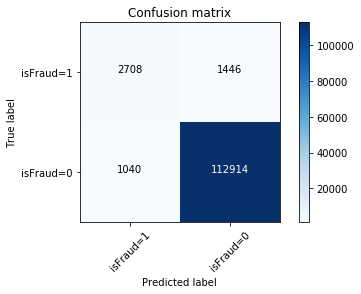

In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['isFraud=1','isFraud=0'],normalize= False,  title='Confusion matrix')